In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the result csv file
df_1 = pd.read_csv('results.csv')
df_1.head()

,BestObjectives,MeanObjectives,iterations,DiversityScores
0,91695.302231,inf,1,2
1,89850.101078,inf,2,5
2,85961.400617,inf,3,19
3,81721.581727,inf,4,70
4,78286.371424,85694.89189,5,90


In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

[]

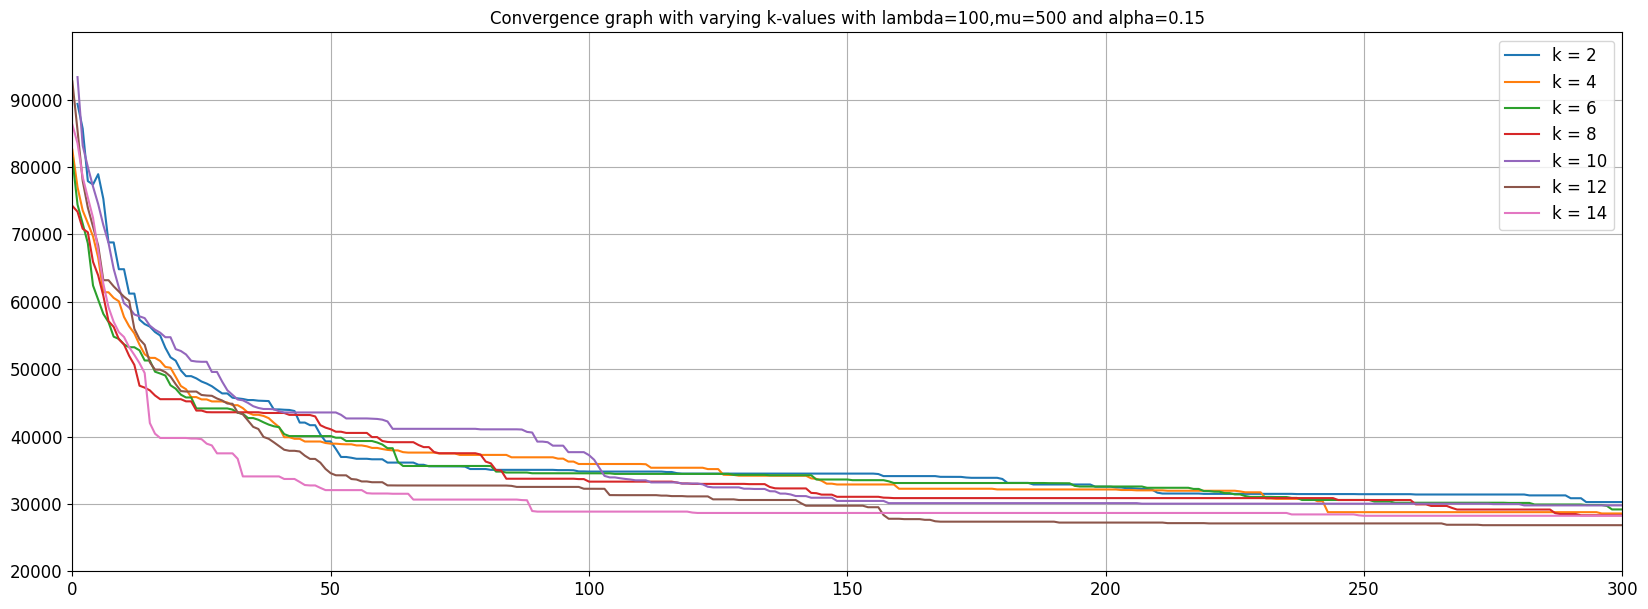

In [100]:
# only k plot
df_k = pd.read_csv('k.csv')

fig, ax = plt.subplots(1,1, figsize=(20, 7))
# plot the k values
for i in range(2,16,2):
    ax.plot(df_k[f'{i}Best'], label='k = ' + str(i))
ax.set_title('Convergence graph with varying k-values with lambda=100,mu=500 and alpha=0.15')

ax.set_xlim(0,300)
ax.set_xticks(range(0, 310, 50))
ax.grid(True)
ax.legend()

ax.set_ylim(25000, 100000) 
ax.set_yticks(range(20000, 100000,10000))
ax.plot()

In [71]:
df_k.columns

Index(['0', '2Mean', '2Best', '2Diversity', '3Mean', '3Best', '3Diversity',
       '4Mean', '4Best', '4Diversity', '5Mean', '5Best', '5Diversity', '6Mean',
       '6Best', '6Diversity', '7Mean', '7Best', '7Diversity', '8Mean', '8Best',
       '8Diversity', '9Mean', '9Best', '9Diversity', '10Mean', '10Best',
       '10Diversity', '11Mean', '11Best', '11Diversity', '12Mean', '12Best',
       '12Diversity', '13Mean', '13Best', '13Diversity', '14Mean', '14Best',
       '14Diversity', '15Mean', '15Best', '15Diversity'],
      dtype='object')

/var/folders/9q/lx6l777n2r74fbdg4g7ckqn40000gn/T/ipykernel_1082/2035739015.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


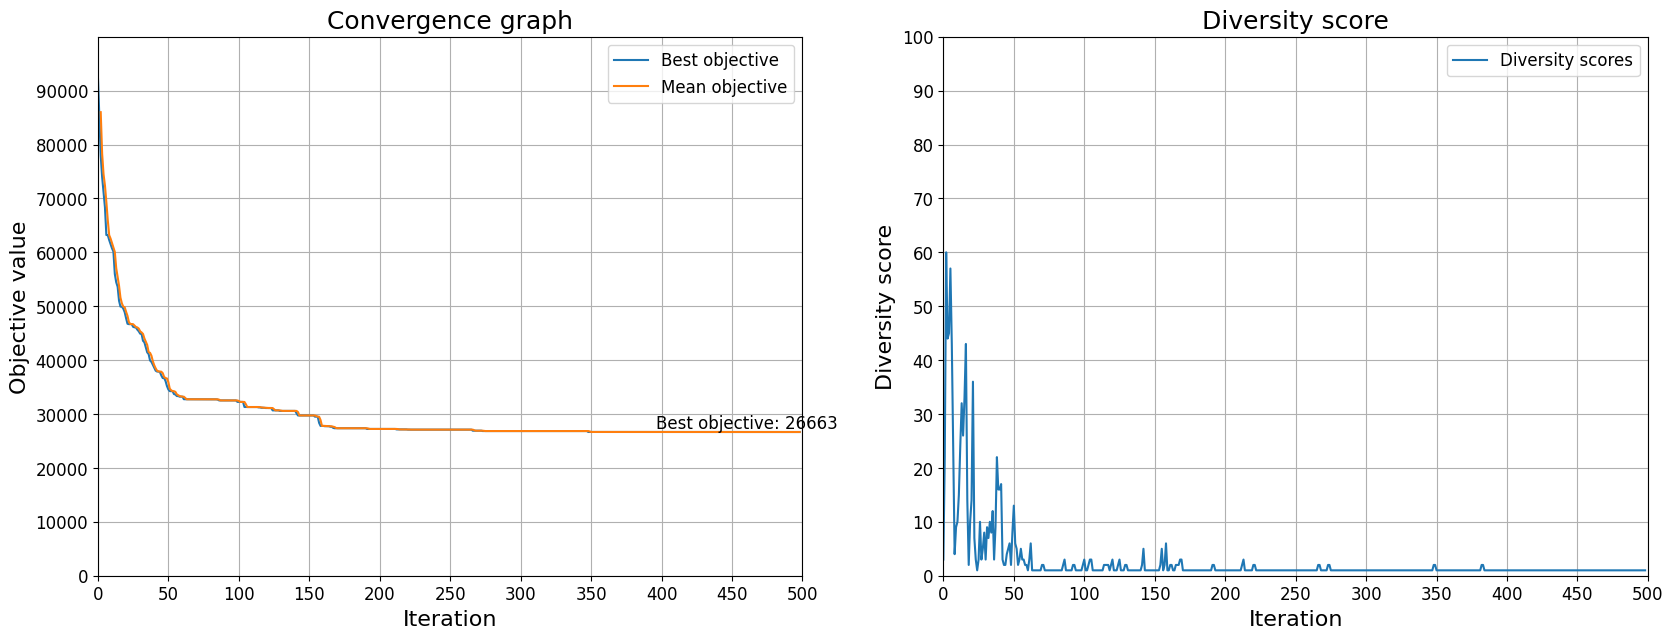

In [101]:
# plot the results in a single figure with 2 plots vertically
fig, ax = plt.subplots(1,2, figsize=(20, 7))

num_iters = 525
# plot the convergence plot
ax[0].plot(df_k['12Best'], label='Best objective')
ax[0].plot(df_k['12Mean'], label='Mean objective')
ax[0].set_xlim(0, 500)
ax[0].set_xticks(range(0, 510, 50))
ax[0].set_xlabel('Iteration')
ax[0].set_ylim(0, 100000)
ax[0].set_yticks(range(0, 100000, 10000))
ax[0].set_ylabel('Objective value')
ax[0].legend()
ax[0].set_title('Convergence graph', fontdict={'fontsize': BIGGER_SIZE})
ax[0].grid(True)
# add the text label for the last point
ax[0].text(num_iters, df_k['12Best'].iloc[-1], 'Best objective: ' +
           str(round(df_k['12Best'].iloc[-1])), horizontalalignment='right', verticalalignment='bottom')

# plot the diversity score
ax[1].plot(df_k['12Diversity'], label='Diversity scores')
ax[1].set_xlim(0, 500)
ax[1].set_xticks(range(0, 510, 50))
ax[1].set_xlabel('Iteration')
ax[1].set_ylim(0, 100)
ax[1].set_yticks(range(0, 110, 10))
ax[1].set_ylabel('Diversity score')
ax[1].legend()
ax[1].set_title('Diversity score', fontdict={'fontsize': BIGGER_SIZE})
ax[1].grid(True)

fig.show()

# save the figure to file
fig.savefig('results.png', dpi=600, bbox_inches='tight')

In [5]:
df_2 = pd.read_csv('solutions.csv')
iterations = list(range(1,6))


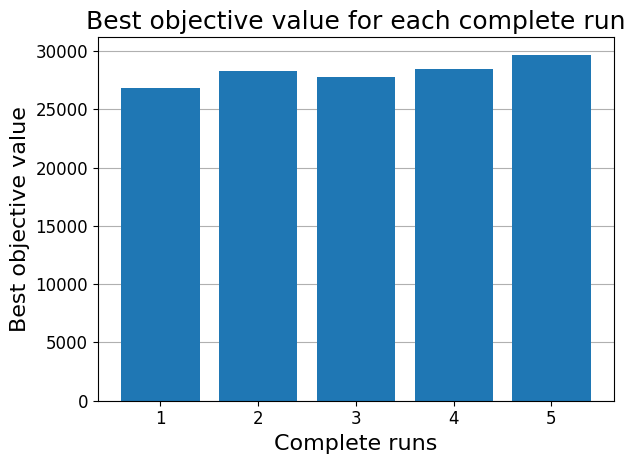

In [6]:
plt.bar(iterations, df_2['solutions'],zorder=2)
plt.xlabel('Complete runs')
plt.ylabel('Best objective value')
plt.title('Best objective value for each complete run',fontdict={'fontsize': BIGGER_SIZE})
plt.grid(axis='y', zorder = 0)
plt.tight_layout()



/var/folders/9q/lx6l777n2r74fbdg4g7ckqn40000gn/T/ipykernel_1082/3223493782.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


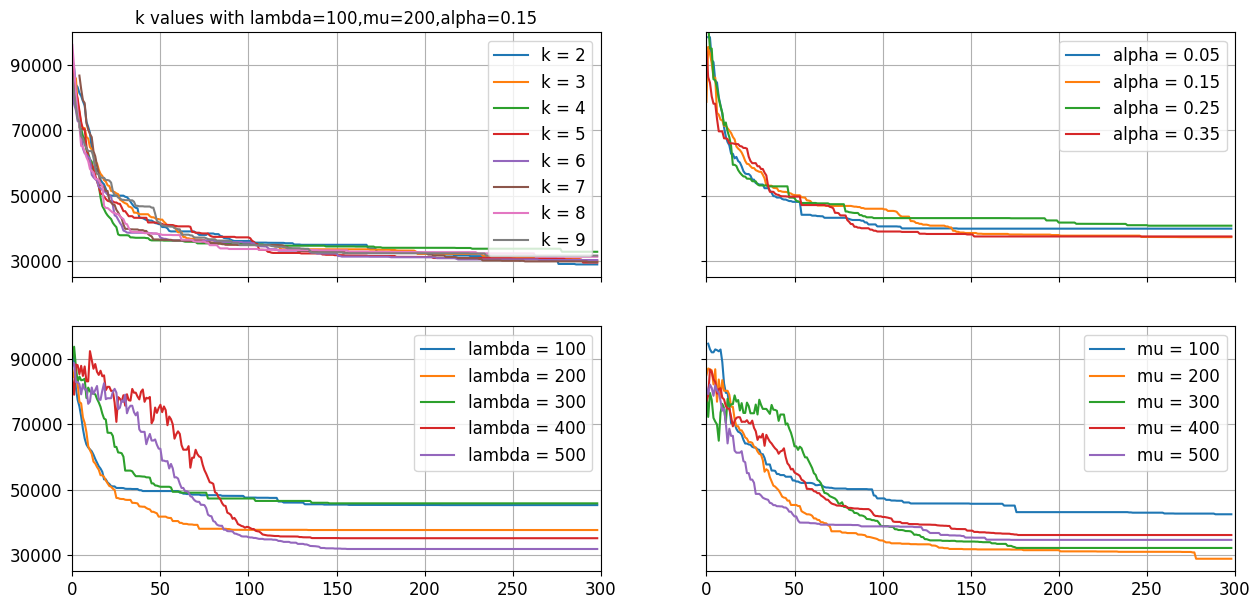

In [54]:
# load k results
df_k = pd.read_csv('k.csv')
df_alpha = pd.read_csv('alpha.csv')
df_mu = pd.read_csv('mu.csv')
df_lambda = pd.read_csv('lamb.csv')


num_iters = 300

fig, ax = plt.subplots(2,2, figsize=(15, 7))

# plot the k values
for i in range(2,10,1):
    ax[0,0].plot(df_k[f'{i}Best'], label='k = ' + str(i))
ax[0,0].set_title('k values with lambda=100,mu=200,alpha=0.15')

# plot the alpha values
for i in np.arange(0.05,0.45,0.1):
    ax[0,1].plot(df_alpha[f'{i}Best'], label='alpha = ' + str(round(i,2)))

# plot the lambda values
for i in range(100,600,100):
    ax[1,0].plot(df_lambda[f'{i}Best'], label='lambda = ' + str(i))

# plot the mu values
for i in range(100,600,100):
    ax[1,1].plot(df_mu[f'{i}Best'], label='mu = ' + str(i))

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlim(0, num_iters)
        ax[i,j].grid(True)
        ax[i,j].legend()

        ax[i,j].set_ylim(25000, 100000) 
        ax[i,j].set_yticks(range(30000, 100000,20000))

        if i == 0:
            ax[i,j].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
        if j == 1:
            ax[i,j].tick_params(axis='y', which='both', left=True, right=False, labelleft=False)

fig.show()

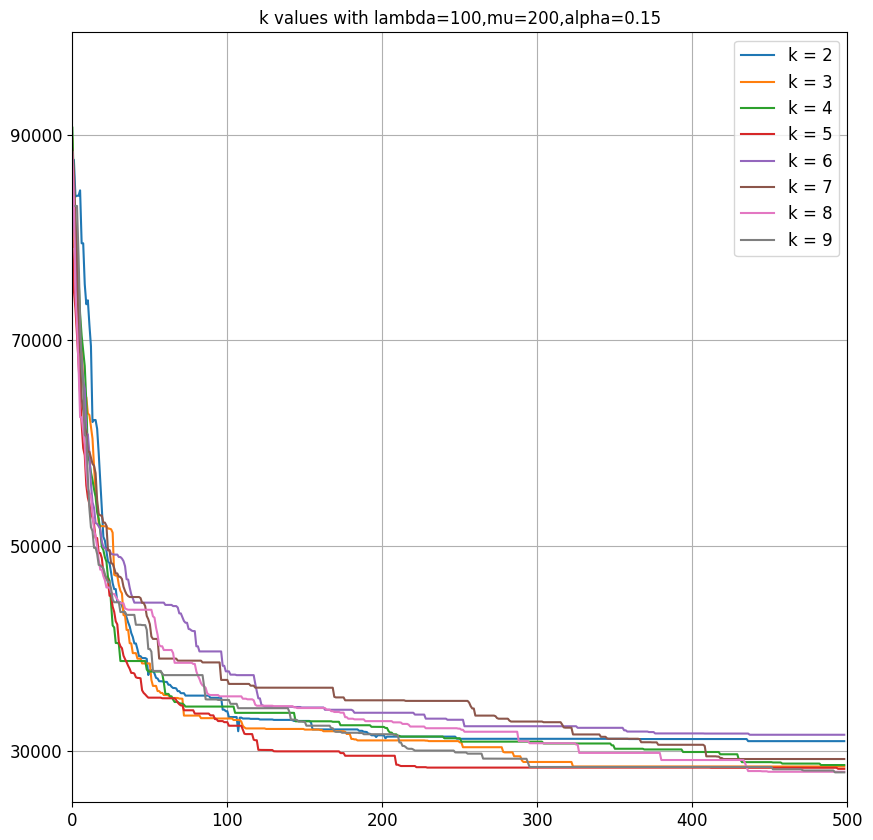